In [16]:
from IPython.display import display, Markdown
def latexify(x):
    out = '$' + x + '$'
    return out

def lprint(x):
    display(Markdown(latexify(latex(x))))
    

# Taylor Expansions of Multivariate functions

First we recall how we Taylor expand functions of the form $$f: \mathbb{R} \rightarrow \mathbb{R} $$

For example: $$ f(x) = sin(x) $$

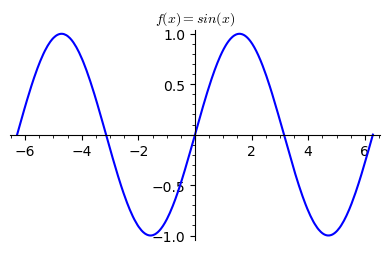

In [2]:
var('x') # set a variable x
f = sin(x) # f is a function that takes values in x
plot(f,-2*pi,2*pi, thickness=1.5, title='$f(x) = sin(x)$',figsize=4)

$sin(x)$ has a taylor expansion at $x=0$ of the form:

In [3]:
display(Markdown('$' + 'sin(x)  ≈ ' + latex(f.taylor(x, 0, 10)) + '$'))

$sin(x)  ≈ \frac{1}{362880} \, x^{9} - \frac{1}{5040} \, x^{7} + \frac{1}{120} \, x^{5} - \frac{1}{6} \, x^{3} + x $

Here we have a truncated the sum that makes up the Taylor expansion, the general rule for which is as follows:

In [4]:
%%latex
\begin{equation*}
 f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f(a)}{2!}(x-a)^2 + \frac{f'(a)}{3!}(x-a)^3+\dotsb = \sum_{k=0}^\infty \frac{f^{\left(k\right)}(a)}{k!} (x-a)^k,
\end{equation*}

<IPython.core.display.Latex object>

Here we set $a=0$ and $f(x) = sin(x)$ and looked only at the first ten terms, many of which were zero. The infinite Taylor expansion of $sin(x)$ can be written in closed form, but in this project we will be primarily concerned with truncated, (so finite), Taylor sums. Which we see are just polynomials.

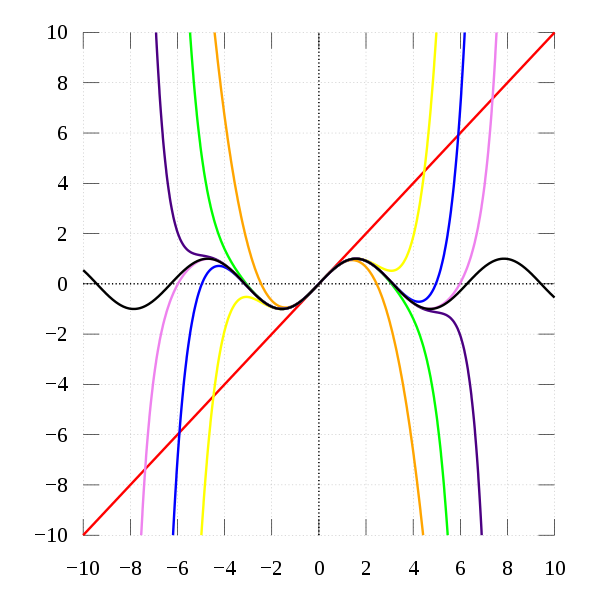

In [5]:
from IPython.display import Image
Image("600px-Sintay_SVG.svg.png")

Here we see some Taylor polynomials for $sin(x)$. as the number of terms of the sum increases, the approximation becomes both more complex and more accurate

Here the dark blue curve is the ninth order polynomial we calculated before.

https://commons.wikimedia.org/wiki/File:Sintay_SVG.svg#file

# Multivariate functions

Now we enter the world of multivariate functions, where appealing diagrams become increasingly unfeasible, and so we must rely on notation as a guide.

We consider functions of the form:
$$f : \mathbb{R}^n \rightarrow \mathbb{R}^m$$

Or when $f$ is not defined on all of $\mathbb{R}^n$, we only define $f$ on a subset $U \subset \mathbb{R}^n$, and consider: 

$$f : U \rightarrow \mathbb{R}^m$$

Throughout this project when we use such a $U$ is it taken to be an open subset of $\mathbb{R}^n$

There are two ingredients to formulate Taylor expansions of multivariate functions: multivariate polynomials and multivariate derivatives

### Multivariate polynomials

Recall that a polynomial $p : \mathbb{R} \rightarrow \mathbb{R}$ is a function of the form $$p(x) = \sum_{i=0}^ka_{i}x^i$$

Where the $a_{i}$ take values in $\mathbb{R}$, including potentially 0; however we generally insist that $a_{k} \neq 0$, in which case we say that the polynomial $p$ has degree $k$

Generalising one step further, we can define a polynomial in n variables $p:\mathbb{R}^n \rightarrow \mathbb{R}$  to have the general form

$$p(x_{1},...,x_{m}) = \sum_{i_{1}+...+i_{m} \leq n} a_{i_{1}...i_{m}}x_{1}^{i_{1}}\cdots x_{m}^{i_{m}}$$

Formula for the number of $a_{i_{1}...i_{m}}$ https://mathoverflow.net/questions/225953/number-of-polynomial-terms-for-certain-degree-and-certain-number-of-variables

Example: the symmetric polynomials, where we can swap around the variables and still get the same polynmonial

In [6]:
h = SymmetricFunctions(QQ).h()
display(Markdown(latexify('p(x_{1},x_{2},x_{3}) = ' + latex(h([2,1]).expand(3, alphabet=['x1','x2','x3']))))) # these are indexed by partitions, here we use the partition 
# [2,1] of a set of three objects to yield this polynomial

$ p(x_{1},x_{2},x_{3}) = x_{1}^{3} + 2 x_{1}^{2} x_{2} + 2 x_{1} x_{2}^{2} + x_{2}^{3} + 2 x_{1}^{2} x_{3} + 3 x_{1} x_{2} x_{3} + 2 x_{2}^{2} x_{3} + 2 x_{1} x_{3}^{2} + 2 x_{2} x_{3}^{2} + x_{3}^{3} $

Here $p : \mathbb{R}^3 \rightarrow \mathbb{R}$

To formulate the most general case - polynomials of the form:

$$ p : \mathbb{R}^n \rightarrow \mathbb{R}^m$$

We just require that each of the "components of p" is a polynomial. Formally, if we use the notation 

$$p(x_{1},...,x_{n}) = ( p_{1}(x_{1},...,x_{n}),...,p_{m}(x_{1},...,x_{n}) )$$

Then we require that each component $p_{i}$, 

$$ p_{i} : \mathbb{R}^n \rightarrow \mathbb{R} $$

is a polynomial, for each $1 \leq i \leq m$,

### Multivariate derivitives

Lets return to considering general functions$$f : U \rightarrow \mathbb{R}^m  \;\;\;\; U \subset \mathbb{R}^n$$ and revise how to compute derivatives

We consider the derivative of each "slot" of the function separately, so in this case $f$ has $m$ components. Like we saw before with the multivariate polynomials.

So first lets choose a component $f_{i}$ for which to consider the derivative, where $i \in \{1,...,m\}$

Now we have:

$$f_{i} : U \rightarrow \mathbb{R}$$

Next we consider the order of the derivative of $f_{i}$ - are we taking the derivative once, twice, three times, etc..

And since the domain of $f_{i}$ is multi-dimensional, we must also decide what directions we are taking these derivatives in.

For multivariate functions, we always take a derivative in a certain direction, usally in the direction of one of the input variables. These directional derivatives are called partial derivatives.

So to consider an explicit example, let $n=m=5$ and consider taking a 3rd order derivative of a component of:

$$f : \mathbb{R}^5 \rightarrow \mathbb{R}^5 $$

For example the second component:

$$f_{2} : \mathbb{R}^5 \rightarrow \mathbb{R}$$

One such 3rd order derivative is:

$$ \partial_{x_{2}} \partial_{x_{3}} \partial_{x_{1}} f_{2}(x) $$

The result of taking a derivative is usually invariant to the order of the directions of the partial derivatives. All we require is $f \in C^{k}$, for a kth order derivative, then the order doesn't matter.

Unfortunately working with derivatives in this form becomes unwieldly. The verbose phrasing for the above derivative is:

"*what is the rate of change in the $x_{2}$ direction of the rate of change in the $x_{3}$ direction of the rate of change of the second component of $f$ in the $x_{1}$ direction?*"

And attempting to arrange **all** the 3rd order derivatives in a sensible manner becomes challenging. As such we upgrade the concept of a derivative, now to encompass all the possible choices we could make in direction. We move the problem of handling them to a well understood area of maths - linear algebra.

#### Generalising the derivative

The key idea at play here is to shift our viewpoint from considering the derivative as a "*rate of change*", and think of it insted as a "*best linear approximation*" (of the function we are differentiating)

This idea is clearly visible when we consider functions 


$$ f : \mathbb{R} \rightarrow \mathbb{R} $$

Where the derivative is often introduced as the slope of the tangent line:

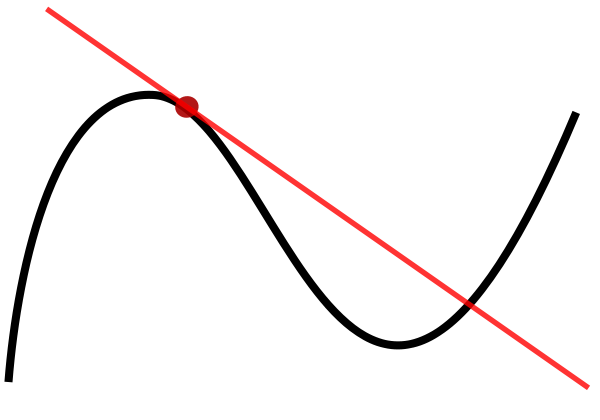

In [7]:
from IPython.display import Image
Image("600px-Tangent_to_a_curve.svg.png")

https://en.wikipedia.org/wiki/File:Tangent_to_a_curve.svg

Now instead we consider the derivative to "be the tangent line", however omitting recording the intercept and only caring about the slope. 

i.e. at a point $x \in \mathbb{R}$, the first derivative $Df_{x}$ is a linear map with the same domain/codomain as f. We write:

$$Df_{x} \in \mathcal{L}(\mathbb{R}, \mathbb{R})$$

So if our "old" scalar valued sense of the derivative at $x$ was computed to be $\lambda$, perhaps written $f'(x) = \lambda$, then we can see that:

$$Df_{x}(y) = \lambda y$$

Now we can consider multivariate derivatives (first order derivatives at least), let $f$ be a function, where:

$$ f : \mathbb{R}^n \rightarrow \mathbb{R}^m $$

Then what is the best linear approximation of $f$, at a point $x$?, well that depends on $f$ and $x$, but we know it must be a linear map between $\mathbb{R}^n$ and $\mathbb{R}^m$, i.e.:

$$Df_{x} \in \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m)$$

Once we decide on a basis on each argument - for example the standard basis, then we can see that we can represent $Df_{x}$ as a matrix. Here each row in the matrix stores the partial derivatives for a component of $f$, and the columns designate which direction the partial derivative is taken in.

For example, let:
    
$$f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$$

Then the derivative of $f$ at $x$, $Df_{x}$, has matrix representation (according to the standard basis):

$$\begin{bmatrix}
\partial_{x_{1}}f_{1}(x) & \partial_{x_{2}}f_{1}(x) \\
\partial_{x_{1}}f_{2}(x) & \partial_{x_{2}}f_{2}(x)
\end{bmatrix}$$

#### Higher derivatives

But now how to define $D^2f_{x}$? Before this was the rate of change of the rate of change, but now we want to remain using the language of linear approximations.

First we observe that by considering the set $\{ Df_{x} \;\; | \;\; x \in U\}$ where $U \subset \mathbb{R}^n$, there is a natural derivative function:

$$Df : U \rightarrow \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m)$$

Now, we simply define the second order derivative at $x$, $D^2f_{x}$; to be the best linear approximation of $Df$, so

$$D^2f_{x} \in \mathcal{L}(\mathbb{R}^n, \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m))$$

And so naturally induce a function: 

$$D^2f : U \rightarrow \mathcal{L}(\mathbb{R}^n, \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m))$$

Seeing now that a third order derivative would look like: 

$$D^3f_{x} \in \mathcal{L}(\mathbb{R}^n, \mathcal{L}(\mathbb{R}^n, \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m)))$$

However this seems no more comprehendible than the previous formulation via partial derivatives. To simplify we observe that these "nested linear maps" can be viewed as another object from linear algebra - multi-linear maps.

See that for a general nested linear map derivative $D^kf_{x}$, we can evaluate this linear map for some $x \in \mathbb{R}^n$, and yield a new nested linear map, with one less pair of brackets.

For example, let $y \in \mathbb{R}^n$, then,

$$D^3f_{x}(y) \in \mathcal{L}(\mathbb{R}^n, \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m))$$

Repeating this process twice more, we arrive at an evaluation:

$$D^3f_{x}(y)(z)(w) \in \mathbb{R}^m$$

for $y,z,w \in \mathbb{R}^n$

Using the old notation this would be $\partial_{y} \partial_{z} \partial_{w} f(x)$

The claim is that:

$$D^kf_{x} \in \mathcal{M}^k(\mathbb{R}^n, \mathbb{R}^m)$$

A k-linear map:

$$D^kf_{k} : \mathbb{R}^n \times...\times \mathbb{R}^n \rightarrow \mathbb{R}^m$$ (k-times $\mathbb{R}^n$)

Our example of $D^3f_{x}(y)$ elucidates why such a mapping should have domain $ \mathbb{R}^n \times...\times \mathbb{R}^n$ and codomain $\mathbb{R}^m$, but why is such a map k-linear?

This can be shown inductively:

Let $$\lambda \in \mathcal{L}(\mathbb{R}^n, \mathcal{M}^{k-1}(\mathbb{R}^n, \mathbb{R}^m)$$

Then define:

$$\lambda' \in \mathcal{M}^k(\mathbb{R}^n, \mathbb{R}^m)$$

by:

$$ \lambda'(x_{1},x_{2},...,x_{n}) = \lambda(x_{1})(x_{2},...,x_{n})$$

So then linearity of $\lambda'$ in the first slot follows by:

$$ \lambda'(x_{1}+x'_{1}, x_{2},...,x_{n})  = \lambda(x_{1}+x'_{1})(x_{2},...,x_{n}) $$

$$ = \lambda(x_{1})(x_{2},...,x_{n}) + \lambda(x'_{1})(x_{2},...,x_{n})$$

$$ = \lambda'(x_{1}, x_{2},...,x_{n}) + \lambda'(x'_{1}, x_{2},...,x_{n})$$

and then linearity in the $i$th slot, $2\leq i \leq n$ 

$$ \lambda'(x_{1}, x_{2},\;...\;,\; x_{i} + x'_{i},\;... \;,x_{n}) = \lambda(x_{1})(x_{2},\;...\;,\; x_{i} + x'_{i},\;... \;,x_{n})$$


$$ = \lambda(x_{1})(x_{2},\;...\;,\; x_{i},\;... \;,x_{n}) + \lambda(x_{1})(x_{2},\;...\;,\; x'_{i},\;... \;,x_{n}) $$

$$ =  \lambda'(x_{1}, x_{2},\;...\;,\; x_{i},\;... \;,x_{n}) +  \lambda'(x_{1}, x_{2},\;...\;,\;x'_{i},\;... \;,x_{n})$$


So then by observing that when $k=1$, the spaces $\mathcal{M}^1(\mathbb{R}^n, \mathbb{R}^m)$ and $\mathcal{L}(\mathbb{R}^n, \mathbb{R}^m)$ are the same, we have have proved the claim (number?) by induction.

### Multivariate Taylor series

In the single dimensional case, Taylor series used derivatives to produce the coefficients of polynomials. Extending to the multi-dimensional case, we use the k-linear maps to produce the coefficents. Recall that that while there is only one term in a single variable of order $k$, that is $x^k$, in the case of polynomial with multiple variables, there are many, e.g.:


$$x_{0}^1x_{1}^{k-1}$$

$$x_{0}^2x_{1}^3x_{2}^{k-5}$$ etc...

It turns out that the k-linear derivatives store precisely the information we need to produce polynomials that approximate $f$ well.

And so we can now state Taylor's Theorem:

Let $f \in C^{n+1}(U, \mathbb{R}^m)$,

$f : U \rightarrow \mathbb{R}^m$,

for $U \subset \mathbb{R}^n, \;\; n,m \in \mathbb{N}$

Let $x, x_{0} \in U$

Then, defining $D^0f_{x_{0}}x^0 = f(x_{0})$, we have that:

$$ f(x) = R_{n}(x,x_{0}) + \sum_{k=0}^n \frac{1}{k!}D^kf_{x_{0}}(x-x_{0},...,x-x_{0})$$

Where $R_{n}(x,x_{0})$ is an error term that is gets smaller as $n$ increases, provided the $x$ is sufficiently close to $x_{0}$ and the derivatives don't "blow up" as they increase. (include formula)

Proof - see "Analytic Theory of Global Bifircation...."

### Example

Now lets see an example:

let $$f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$$

Where:
    
$$ f(x,y) = \begin{bmatrix}
    sin(x) + xcos(y) \\
    e^xy - xy \\
    \end{bmatrix} $$

A fairly complicated function.

In [39]:
myvars = var('x y')
f(x,y) = (sin(x) + x*cos(y), exp(x)*y - x*y)
display(Markdown(latexify(latex(f))))

$ \left( x, y \right) \ {\mapsto} \ \left(x \cos\left(y\right) + \sin\left(x\right),\,-x y + y e^{x}\right) $

Sage needs each component separated to compute a taylor series

In [56]:
f1(x,y) = sin(x) + x*cos(y)
f2(x,y) = exp(x)*y - x*y
lprint(f1)
lprint(f2)

$ \left( x, y \right) \ {\mapsto} \ x \cos\left(y\right) + \sin\left(x\right) $

$ \left( x, y \right) \ {\mapsto} \ -x y + y e^{x} $

In [58]:
lprint(f1.taylor((x,0),(y,0), 4))

$ \left( x, y \right) \ {\mapsto} \ -\frac{1}{6} \, x^{3} - \frac{1}{2} \, x y^{2} + 2 \, x $

In [61]:
lprint(f2.taylor((x,0),(y,0), 4))

$ \left( x, y \right) \ {\mapsto} \ \frac{1}{6} \, x^{3} y + \frac{1}{2} \, x^{2} y + y $

We can see how we arrived at least at the first order terms, by looking at the derivatives:

In [67]:
lprint(f1.diff()(0,0))
lprint(f2.diff()(0,0))

$ \left(2,\,0\right) $

$ \left(0,\,1\right) $

These values would form our matrix that represented $D^1f_{(0,0)} : \mathbb{R}^2 \rightarrow \mathbb{R}^2$